## Train Basic Neural Network

a fun exercise to see how well you understand my AI Simplified Playlist:
<br>
https://youtube.com/playlist?list=PLqXS1b2lRpYTpUIEu3oxfhhTuBXmMPppA
<br>
<br>
The entire code below is explained step by step, command by command, in this tutorial of mine: 
<br>
https://youtu.be/xpPX3fBM9dU
<br>
<br>
by: Mariya Sha

### STEP 1: Generate Data

In [2]:
import numpy as np
import pandas as pd

rg = np.random.default_rng()

def generate_data(n_features, n_values):
    features = rg.random((n_features, n_values))
    weights = rg.random((1, n_values))[0]
    targets = np.random.choice([0,1], n_features)
    data = pd.DataFrame(features, columns=["x0", "x1", "x2"])
    data["targets"] = targets
    return data, weights
    
data, weights = generate_data(4,3)
print(data)

         x0        x1        x2  targets
0  0.478816  0.777988  0.922863        1
1  0.920623  0.781320  0.412412        1
2  0.908053  0.025213  0.095844        0
3  0.584172  0.047131  0.602358        0


### STEP 2: Train Model

In [3]:
bias = 0.5
l_rate = 0.1
epochs = 50
epoch_loss = []

def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            # gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**************************")
        print("epoch", e)
        print(average_loss)
        
train_model(data, weights, bias, l_rate, epochs)

**************************
epoch 0
0.300648502324387
**************************
epoch 1
0.2828694554803402
**************************
epoch 2
0.2687356174613547
**************************
epoch 3
0.2574556381019552
**************************
epoch 4
0.2483400337491835
**************************
epoch 5
0.24082772308042194
**************************
epoch 6
0.23448472015828942
**************************
epoch 7
0.2289878165690163
**************************
epoch 8
0.22410299475833395
**************************
epoch 9
0.21966431544610082
**************************
epoch 10
0.2155558925703791
**************************
epoch 11
0.21169765797155124
**************************
epoch 12
0.20803466484836247
**************************
epoch 13
0.20452931742939862
**************************
epoch 14
0.20115586015866482
**************************
epoch 15
0.1978965379430719
**************************
epoch 16
0.194738956906054
**************************
epoch 17
0.19167429009308384
*************

### STEP 3: Plot/Visuallize data

Text(0.5, 1.0, 'Training (Epochs VS Loss)')

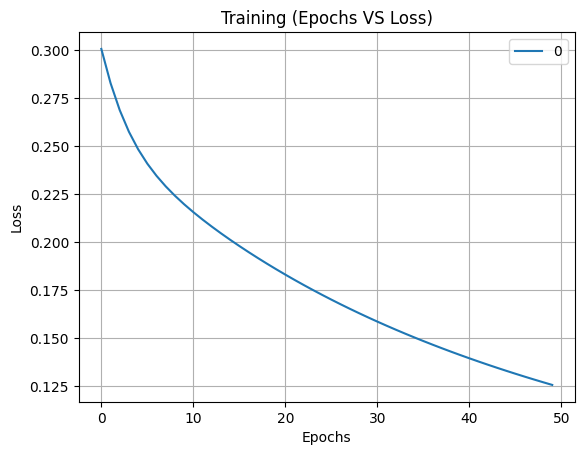

In [4]:
df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True)

# Add titles
df_plot.set_xlabel('Epochs')
df_plot.set_ylabel('Loss')
df_plot.set_title('Training (Epochs VS Loss)')